In [4]:
import h5py
import numpy as np

with h5py.File('/iopsstor/scratch/cscs/stefschu/DSM500_FPR/data/FCN_ERA5_data_v0/train/1979.h5', 'r') as f:
    sst_data = np.array(f['fields'][0][20])
    t2m_data = np.array(f['fields'][0][2])
    data = np.array(f['fields'][0])

In [13]:
netcdf_file = '/iopsstor/scratch/cscs/stefschu/DSM500_FPR/data/FCN_ERA5_data_v0/static/land_sea_mask.nc'

with h5py.File(netcdf_file, 'r') as f:
    mask = np.array(f['lsm'][0])

mask.shape

(721, 1440)

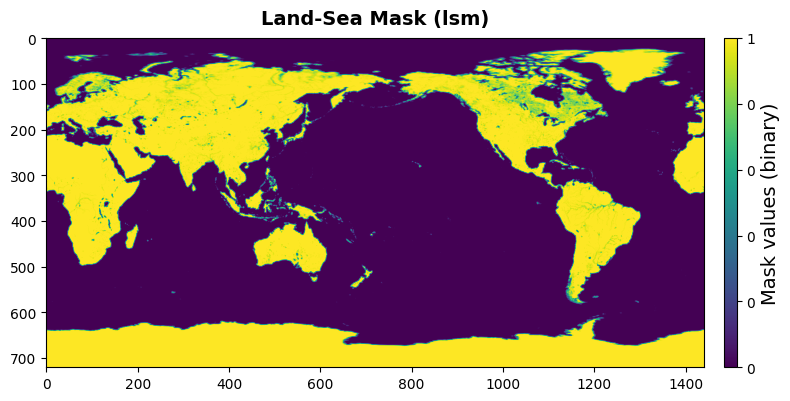

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(mask)

ax.set_title("Land-Sea Mask (lsm)", fontsize=14, fontweight='bold', pad=10)

# Create colorbar with same height as plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

norm = plt.Normalize(vmin=mask.min(), vmax=mask.max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'),
                    cax=cax, format=ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

cbar.set_label("Mask values (binary)", fontsize=14)

plt.tight_layout()
plt.show()

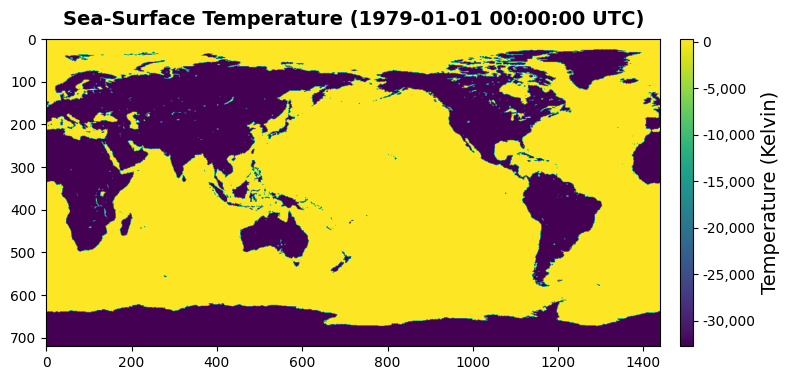

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(sst_data)

ax.set_title("Sea-Surface Temperature (1979-01-01 00:00:00 UTC)", fontsize=14, fontweight='bold', pad=10)

# Create colorbar with same height as plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

norm = plt.Normalize(vmin=sst_data.min(), vmax=sst_data.max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'),
                    cax=cax, format=ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

cbar.set_label("Temperature (Kelvin)", fontsize=14)

plt.tight_layout()
plt.show()

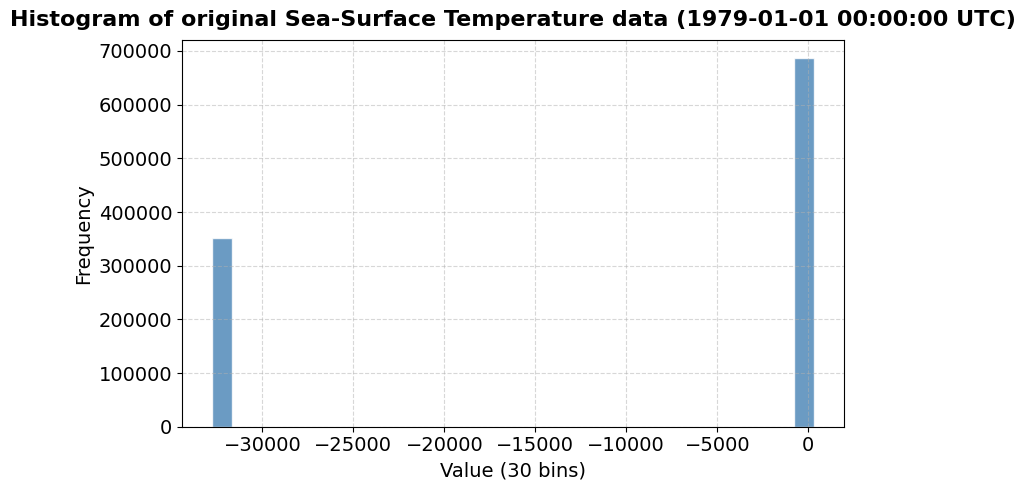

In [49]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(
    sst_data.flatten(),
    bins=30,
    color='steelblue',
    edgecolor='white',
    alpha=0.8
)

# Styling
ax.set_title("Histogram of original Sea-Surface Temperature data (1979-01-01 00:00:00 UTC)", fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Value (30 bins)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Grid and ticks
ax.grid(True, linestyle='--', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Tight layout
plt.tight_layout()
plt.show()


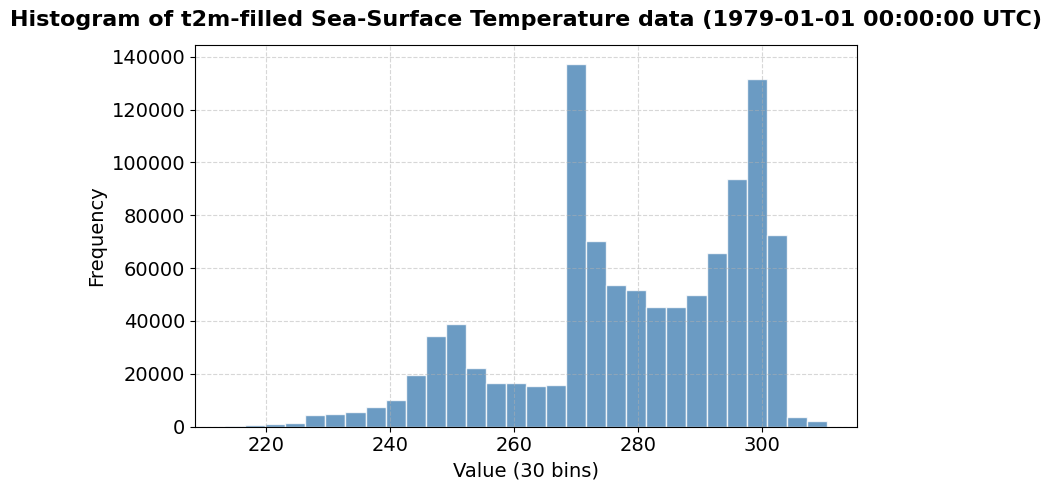

In [48]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(
    fixed_sst_data.flatten(),
    bins=30,
    color='steelblue',
    edgecolor='white',
    alpha=0.8
)

# Styling
ax.set_title("Histogram of t2m-filled Sea-Surface Temperature data (1979-01-01 00:00:00 UTC)", fontsize=16, fontweight='bold', pad=14)
ax.set_xlabel("Value (30 bins)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Grid and ticks
ax.grid(True, linestyle='--', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Tight layout
plt.tight_layout()
plt.show()


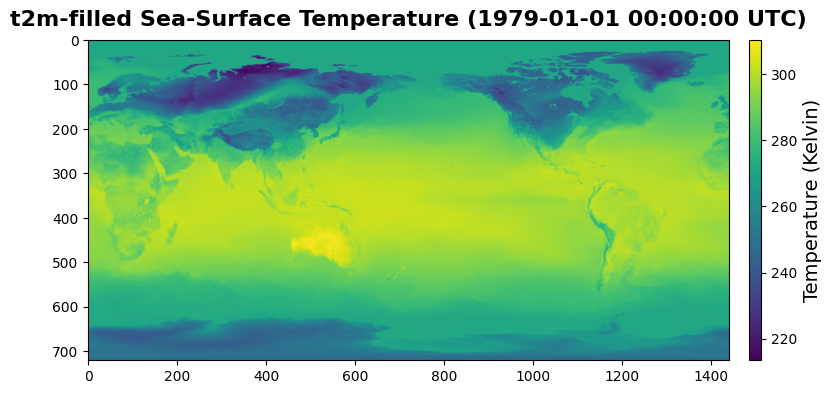

In [42]:
fixed_sst_data = np.where(sst_data == -32767.0, t2m_data, sst_data)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(fixed_sst_data)

ax.set_title("t2m-filled Sea-Surface Temperature (1979-01-01 00:00:00 UTC)", fontsize=16, fontweight='bold', pad=10)

# Create colorbar with same height as plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

norm = plt.Normalize(vmin=fixed_sst_data.min(), vmax=fixed_sst_data.max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'),
                    cax=cax, format=ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

cbar.set_label("Temperature (Kelvin)", fontsize=14)

plt.tight_layout()
plt.show()

In [69]:
import yaml

with open('/iopsstor/scratch/cscs/stefschu/DSM500_FPR/data/FCN_ERA5_data_v0/metadata.yaml', 'r') as f:
    meta = yaml.safe_load(f)

'Sea Surface Temperature'

In [ ]:
import numpy as np

stds_old = np.load("/iopsstor/scratch/cscs/stefschu/DSM500_FPR/data/FCN_ERA5_data_v0/stats/time_diff_std.npy")
stds_new = np.load("/iopsstor/scratch/cscs/stefschu/DSM500_FPR/data/FCN_ERA5_data_v0/stats/time_diff_std_with_sst_fix.npy")


print(" Channel:   Old weight:     New weight:      Channel name:")

for c in range(21):
    print(f"{c:7}     {1/stds_old[0, c]:10.4f}  {1/stds_new[0, c]:14.4f}       {meta[c]['title']}")

 Channel:   Old weight:     New weight:      Channel name:
      0         0.4357          0.4357       U-Wind Component (at 10 meters)
      1         0.3839          0.3839       V-Wind Component (at 10 meters)
      2         0.3155          0.3155       Air Temperature (at 2 meters)
      3         0.0039          0.0039       Surface Pressure
      4         0.0037          0.0037       Mean Sea Level Pressure
      5         0.6005          0.6005       Temperature (at 850 hPa)
      6         0.3956          0.3956       U-Wind Component (at 1000 hPa)
      7         0.3456          0.3456       V-Wind Component (at 1000 hPa)
      8         0.0046          0.0046       Geopotential (at 1000 hPa)
      9         0.3180          0.3180       U-Wind Component (at 850 hPa)
     10         0.2844          0.2844       V-Wind Component (at 850 hPa)
     11         0.0051          0.0051       Geopotential (at 850 hPa)
     12         0.2536          0.2536       U-Wind Component (at 